### Logistic Regression - Label Classification

In [1]:
import sys
sys.path.append('../../')

# Import libraries
from utils.load import load
from utils.score import fold_cross_validate, visualize_classification_result, visualize_feature_importance
from utils.print import print_cross_validation_scores, print_scores
from constant.columns import FEATURES, LABEL

import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, KFold, GridSearchCV

In [2]:
# Import data
df = pd.read_csv('./source/dataset.csv')
X, y = df[FEATURES], df[LABEL]

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

#### Find the best parameter to build the model with the best accuracy.

In [3]:
# Define the parameter grid
param_grid = [
    {'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'solver': ['liblinear']},
    {'penalty': ['elasticnet'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'solver': ['saga'], 'l1_ratio': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]},
    {'penalty': ['l2', 'none'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'solver': ['lbfgs']}
]

# Create a base model
logreg = LogisticRegression()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

print(f"Best parameters: {best_params}")

Fitting 5 folds for each of 105 candidates, totalling 525 fits
Best parameters: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}


c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#### Cross Validation

In [4]:
# Define the model
clf_cv = LogisticRegression()
scores = fold_cross_validate(clf_cv, X, y)

# Print scores
print_cross_validation_scores(scores)

MACRO:
Precision: 0.6609 (0.1595)
Recall: 0.5957 (0.0984)
F1 score: 0.6106 (0.1181)
---------------------------------
MICRO:
Precision: 0.9420 (0.0202)
Recall: 0.9420 (0.0202)
F1 score: 0.9420 (0.0202)


#### Feature Importance

c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConve

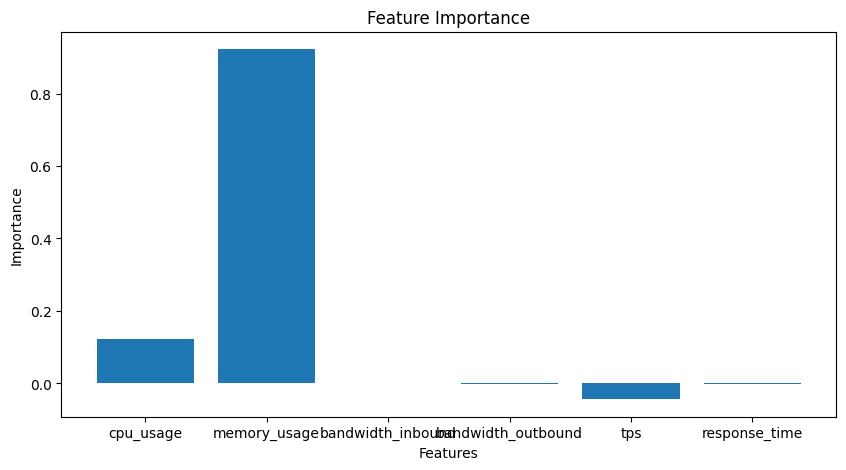

In [5]:
# Convert to numpy arrays
X = np.array(X)
y = np.array(y)

# Initialize the array where we'll store the coefficients for each fold
coefficients = np.zeros((10, X.shape[1]))

# Prepare the cross-validation procedure
cv = KFold(n_splits=10)
logreg = LogisticRegression()

# Perform the cross-validation
for i, (train, test) in enumerate(cv.split(X)):
    # Split the data
    X_train, y_train = X[train], y[train]

    # fit the model with data
    logreg.fit(X_train, y_train)

    # Store the coefficients
    coefficients[i, :] = logreg.coef_[0]

# Calculate the mean coefficient for each feature across folds
mean_coefficients = coefficients.mean(axis=0)
visualize_feature_importance(mean_coefficients, FEATURES)

In [6]:
mean_coefficients

array([-1.56579707e-01, -1.18809420e+00, -1.06964312e-03,  6.14385063e-04,
        5.57180271e-02,  2.00344397e-03])

#### Train Model

In [7]:
# Create and train the model
clf = LogisticRegression(
    penalty='l1', C=1, solver='liblinear', fit_intercept=False, max_iter=100, class_weight=None)
clf.fit(X_train, y_train)

c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1, fit_intercept=False, penalty='l1', solver='liblinear')

In [8]:
# Predict and print the score
y_pred = clf.predict(X_test)
print_scores(y_test, y_pred)

Accuracy: 0.9433333333333334
Precision: 0.7692307692307693
Recall: 0.4166666666666667
F1: 0.5405405405405406


c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


#### Visualize Result

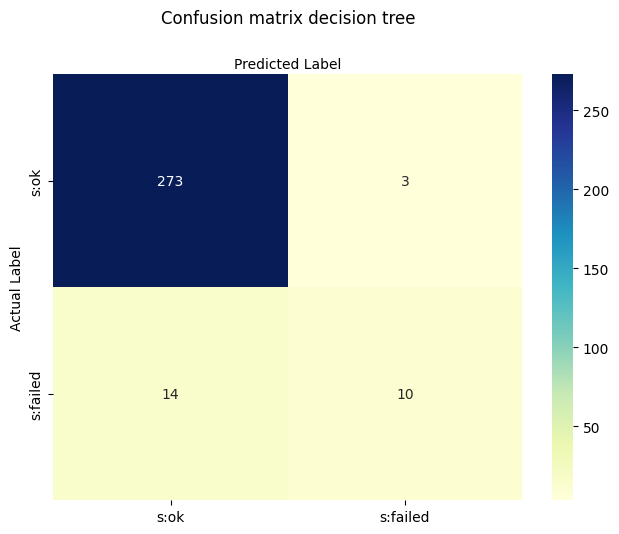

In [9]:
visualize_classification_result(y_test, y_pred)